In [1]:
from pathlib import Path
import re
import warnings

import numpy as np
import pandas as pd
import matplotlib_venn
import matplotlib.pyplot as plt

import bioquest as bq
import genekit as gk

In [2]:
tpm=pd.read_csv("../结果/3.构建SUMOylation相关的分子亚型/tumor.csv.gz",index_col=0)

In [3]:
group=pd.read_csv('../结果/3.构建SUMOylation相关的分子亚型/NMF_Cluster.csv',index_col=0)
group.index = bq.st.subs(string= group.index,start=0,stop=12)
cc=pd.read_csv('../data/SupplementaryTable_train_data_clinical.txt',index_col=1,sep='\t')
group=pd.merge(group,cc,left_index=True,right_index=True)
group.sort_values(by='Cluster',inplace=True)
samples = group.index

In [4]:
from typing import Counter


Counter(group.Cluster)

Counter({'Cluster1': 57, 'Cluster2': 121, 'Cluster3': 258})

In [5]:
tpm.columns = bq.st.subs(string=tpm.columns,start=0,stop=12)

In [6]:
df=pd.read_csv("../data/SUMOYLATION_gene.csv",index_col=0)
tpm = tpm.loc[df.index,samples]

In [6]:
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# exprs=StandardScaler().fit_transform(tpm.T)
# exprs=pd.DataFrame(exprs.T,columns=tpm.columns,index=tpm.index)

In [7]:
from scipy.stats import zscore
exprs = zscore(tpm,axis=0)

In [8]:
import numpy as np
import pandas as pd

import PyComplexHeatmap
from PyComplexHeatmap import *
import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi']=300

In [9]:
top_ha = HeatmapAnnotation(
	Cluster=anno_simple(group.Cluster,add_text=True, colors={'Cluster1': bq.pl.Palette.set2[0], 'Cluster2': bq.pl.Palette.set2[1], 'Cluster3': bq.pl.Palette.set2[2]}),
    Sex=anno_simple(group.Sex, colors={'MALE': bq.pl.Palette.set2[2], 'FEMALE': bq.pl.Palette.set2[3]}),
    Age=anno_simple(group.Age, colors={'Age<60': bq.pl.Palette.set2[4], 'Age>=60': bq.pl.Palette.set2[5]}),
    Stage=anno_simple(group.Stage, colors={'I/II': bq.pl.Palette.set2[4], 'III/IV': bq.pl.Palette.set2[5]}),
    MSI = anno_simple(group.MSI, colors={x: bq.pl.Palette.economist[y] for x,y in zip(["Indeterminate","MSS","MSI-H",np.nan],(0,1,2,3))},legend="G***")
	)

<Figure size 720x720 with 0 Axes>

/opt/homebrew/Caskroom/mambaforge/base/envs/SC/lib/python3.10/site-packages/PyComplexHeatmap/clustermap.py:502: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Starting plotting HeatmapAnnotations


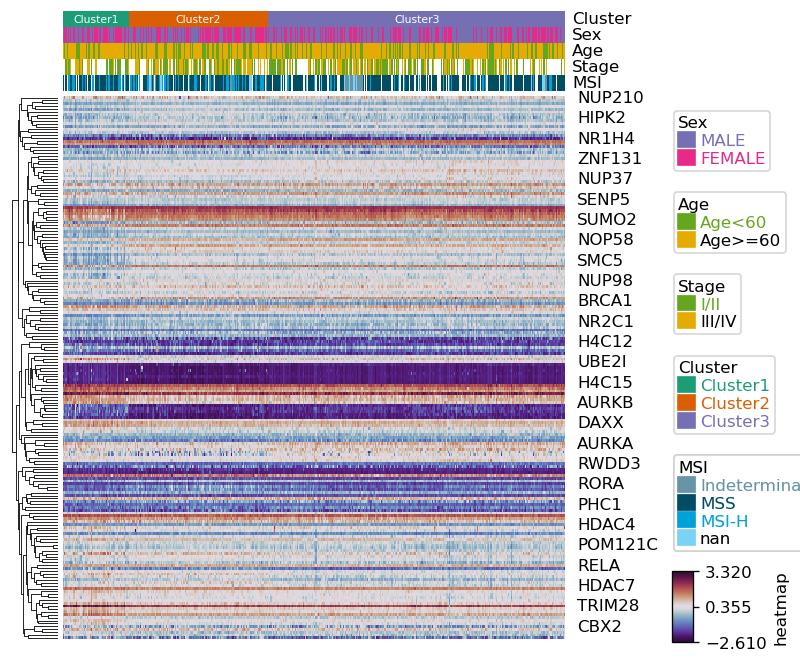

In [10]:
plt.figure(figsize=(6, 6))                         
cm = ClusterMapPlotter(
    data=exprs,
    # vmax=1,
    # vmin=-1,
    # standard_scale=True,
    # z_score = True,
    show_rownames = True,
    show_colnames = False,
    top_annotation=top_ha, 
    col_split=2, 
    col_cluster=False,
    col_dendrogram=False,
    row_dendrogram = True,
    row_split=None, 
    col_split_gap=2,
    row_split_gap=2,
    cmap='twilight_shifted',
    plot=True,
    rasterized=True,
    verbose=0,
    tree_kws={'col_cmap': 'turbo', 'row_cmap': 'turbo'}
    );
plt.savefig("../结果/3.构建SUMOylation相关的分子亚型/cluster_heatmap.pdf", bbox_inches='tight')
# plt.show()

In [11]:
import scipy.stats as spss

In [12]:
tb = pd.crosstab(group.Cluster, group.Sex)
spss.chi2_contingency(tb)

Chi2ContingencyResult(statistic=2.8768813765145835, pvalue=0.23729749110754905, dof=2, expected_freq=array([[ 26.53899083,  30.46100917],
       [ 56.33715596,  64.66284404],
       [120.12385321, 137.87614679]]))

In [13]:
tb = pd.crosstab(group.Cluster, group.Age)
spss.chi2_contingency(tb)

Chi2ContingencyResult(statistic=1.6113505121007627, pvalue=0.446786129638461, dof=2, expected_freq=array([[ 15.94954128,  41.05045872],
       [ 33.85779817,  87.14220183],
       [ 72.19266055, 185.80733945]]))

In [14]:
tb = pd.crosstab(group.Cluster, group.MSI)
spss.chi2_contingency(tb)

Chi2ContingencyResult(statistic=36.477614281171675, pvalue=2.225792926236208e-06, dof=6, expected_freq=array([[  2.70783848,  10.1543943 ,   9.6128266 ,  34.52494062],
       [  5.4631829 ,  20.48693587,  19.39429929,  69.65558195],
       [ 11.82897862,  44.35866983,  41.99287411, 150.81947743]]))

In [15]:
tb = pd.crosstab(group.Cluster, group.Stage)
spss.chi2_contingency(tb)

Chi2ContingencyResult(statistic=3.162407724256561, pvalue=0.2057272817831179, dof=2, expected_freq=array([[15.43018868, 13.56981132],
       [43.63018868, 38.36981132],
       [81.93962264, 72.06037736]]))